In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the datasets
df_train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
# Fill missing values in 'keyword' and 'location' with empty strings
df_train['keyword'] = df_train['keyword'].fillna('')
df_train['location'] = df_train['location'].fillna('')
df_test['keyword'] = df_test['keyword'].fillna('')
df_test['location'] = df_test['location'].fillna('')

# Combine 'keyword' and 'location' with 'text'
df_train['text'] = df_train['keyword'] + " " + df_train['location'] + " " + df_train['text']
df_test['text'] = df_test['keyword'] + " " + df_test['location'] + " " + df_test['text']

In [4]:
# Split the data into training and validation sets
X = df_train["text"]
y = df_train["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(df_test["text"])

In [6]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Predict on the validation set
y_pred_val = model.predict(X_val_tfidf)

print("\nModel Training Complete")


Model Training Complete


In [8]:
# Evaluate the model on validation data
print("\nValidation Classification Report")
print(classification_report(y_val, y_pred_val))


Validation Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       874
           1       0.80      0.71      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



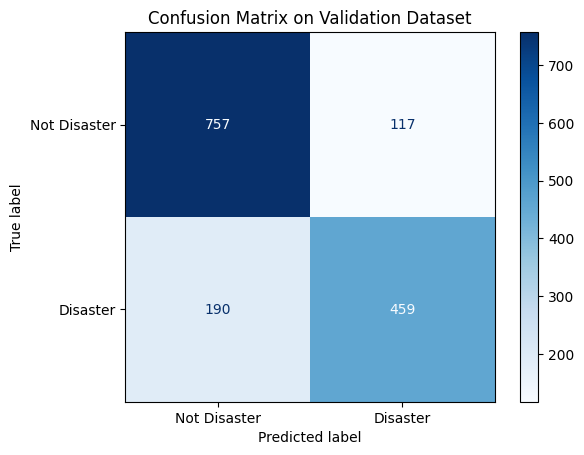

In [9]:
# Display Confusion Matrix
def display_confusion_matrix(y_true, y_pred, dataset):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Disaster", "Disaster"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix on {dataset} Dataset")
    plt.show()

display_confusion_matrix(y_val, y_pred_val, "Validation")

In [10]:
# Predict on the test set
y_test_pred = model.predict(X_test_tfidf)

# Generate the submission file
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission["target"] = y_test_pred
sample_submission.to_csv("/kaggle/working/submission.csv", index=False)

print("\nSubmission file generated: submission.csv")


Submission file generated: submission.csv
